<a href="https://colab.research.google.com/github/Yashaswini944/Customer-lifetime-value-predictor/blob/main/Customer_lifetime_value_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [14]:
# Simulated customer dataset
data = {
    'CustomerID': range(1, 11),
    'Recency': [10, 40, 5, 30, 60, 2, 22, 55, 8, 35],  # Days since last purchase
    'Frequency': [5, 3, 10, 2, 1, 15, 4, 1, 7, 2],      # Purchases made
    'AvgOrderValue': [100, 120, 80, 200, 150, 60, 90, 250, 110, 130],  # Average basket size
    'CLV': [500, 360, 800, 400, 150, 900, 360, 250, 770, 390]  # Actual CLV (target)
}

df = pd.DataFrame(data)

In [11]:
# Features and target
X = df[['Recency', 'Frequency', 'AvgOrderValue']]
y = df['CLV']

In [16]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Predicted CLV values:", np.round(y_pred, 2))
print("Mean Squared Error:", round(mse, 2))
print("R² Score:", round(r2, 2))

Predicted CLV values: [ 645.33  319.49 1020.24]
Mean Squared Error: 10547.15
R² Score: 0.8


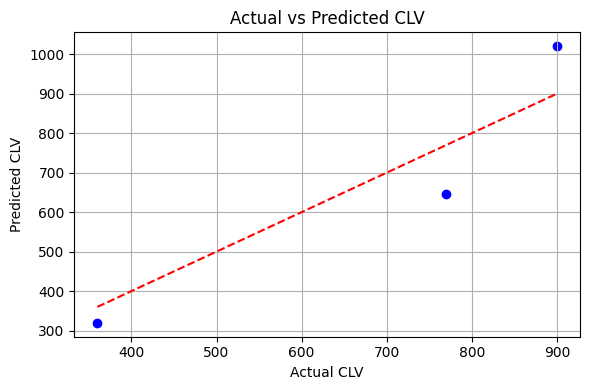

In [19]:
# Plot actual vs predicted
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title("Actual vs Predicted CLV")
plt.xlabel("Actual CLV")
plt.ylabel("Predicted CLV")
plt.grid(True)
plt.tight_layout()
plt.show()